# Machine Learning Fundamentals

Python library : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Binary Classification

Consider a domain where we have data of the form : $D = $ {$(x_1, y_1)$, $(x_2, y_2)$, ... $(x_n, y_n)$},  where $y_{i} = \pm1$.

1. We do not have access to all such data but only a subset $S$ of $D$.

2. Using $S$, our task is to generate a computational procedure that implements the function $f:x\to y$

3. Let $U = D\setminus S$ be unseen data.

### Error Estimate

Error over unseen data $U$ : 

$$E(f, D, U) = \frac{\sum_{(x_i, y_i)\in U}[f(x_i)\ne y_i]}{|U|}$$

$\star$ We can measure how well the model is doing on unseen data whether they buy the products or not and evalute the error $E(f, D, U)$.

### Example : 

範例原函數 : $y = 2x^{2} + x + 2$，使用常態分布(平均 : 0，變異數 : 0.2)產生 noise

In [2]:
# 建立一組 100 data :

def f(x):
    return 2*x**2 + x + 2

noise = np.random.normal(0, 0.2, 100)
x = np.linspace(-1, 1, 100)
y = f(x) + noise

Plot : 

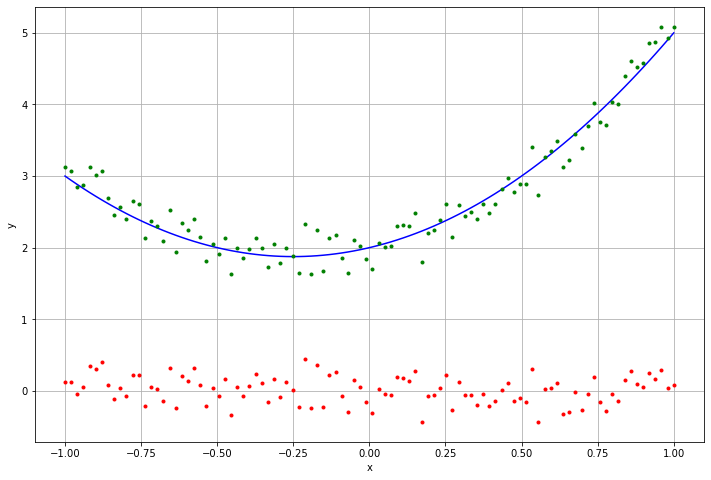

In [3]:
plt.figure(figsize=(12, 8))
plt.plot(x, f(x), 'b')
plt.plot(x, y, 'g.', x, noise, 'r.')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### $Y \simeq  HA$，求 $A$ ?

$A = (H^{T}H)^{-1}H^{T}Y$

In [4]:
x = np.arange(1, 7).reshape(6, 1)
H = np.hstack([np.power(x, i) for i in range(0, 3)])
print("H(x) = \n", H)

x = np.linspace(-1, 1, 100)
fun_data = np.array([f(i) for i in x])
noise = np.random.normal(0, 0.2, 100)
y = fun_data + noise

x_train = x[0:80].reshape(80, 1)
y_train = y[0:80].reshape(80, 1)
x_pre = x[80:]
y_pre = y[80:]

print("\n")
H_xtrain = np.hstack([np.power(x_train, i) for i in range(0, 3)])
print("H(Xtrain) = \n", H_xtrain)

B = np.linalg.inv(np.dot(H_xtrain.T, H_xtrain))
A = np.dot(np.dot(B, H_xtrain.T), y_train)
print("\n")
print("A = \n", A)

H(x) = 
 [[ 1  1  1]
 [ 1  2  4]
 [ 1  3  9]
 [ 1  4 16]
 [ 1  5 25]
 [ 1  6 36]]


H(Xtrain) = 
 [[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00 -9.79797980e-01  9.60004081e-01]
 [ 1.00000000e+00 -9.59595960e-01  9.20824406e-01]
 [ 1.00000000e+00 -9.39393939e-01  8.82460973e-01]
 [ 1.00000000e+00 -9.19191919e-01  8.44913784e-01]
 [ 1.00000000e+00 -8.98989899e-01  8.08182838e-01]
 [ 1.00000000e+00 -8.78787879e-01  7.72268136e-01]
 [ 1.00000000e+00 -8.58585859e-01  7.37169677e-01]
 [ 1.00000000e+00 -8.38383838e-01  7.02887460e-01]
 [ 1.00000000e+00 -8.18181818e-01  6.69421488e-01]
 [ 1.00000000e+00 -7.97979798e-01  6.36771758e-01]
 [ 1.00000000e+00 -7.77777778e-01  6.04938272e-01]
 [ 1.00000000e+00 -7.57575758e-01  5.73921028e-01]
 [ 1.00000000e+00 -7.37373737e-01  5.43720029e-01]
 [ 1.00000000e+00 -7.17171717e-01  5.14335272e-01]
 [ 1.00000000e+00 -6.96969697e-01  4.85766758e-01]
 [ 1.00000000e+00 -6.76767677e-01  4.58014488e-01]
 [ 1.00000000e+00 -6.56565657e-01  